<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/mathofdl/Math_of_DL_L2_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mathematics of Deep Learning
## Lecture 2 Exercises

---
## 1. Linear Regression with Gradient Descent

In this exercise, we perform linear regression from scratch using a real-word dataset relating poverty and murder rates, found [here](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html).

In [ ]:
## Use pandas to import the data

data_url = 'https://github.com/arputtick/dataism/raw/master/assignments/Week%203/Income%20vs.%20Murder.xlsx'
poverty_murder_data = pd.read_excel(data_url)
poverty_murder_data

,Percent with income below $ 5000,"Number of murders per 1,000,000 inhabitants"
0,16.5,11.2
1,20.5,13.4
2,26.3,40.7
3,16.5,5.3
4,19.2,24.8
5,16.5,12.7
6,20.2,20.9
7,21.3,35.7
8,17.2,8.7
9,14.3,9.6


In [ ]:
## Extract our samples in X array and labels in Y array

X = poverty_murder_data['Percent with income below $ 5000']
Y = poverty_murder_data['Number of murders per 1,000,000 inhabitants']

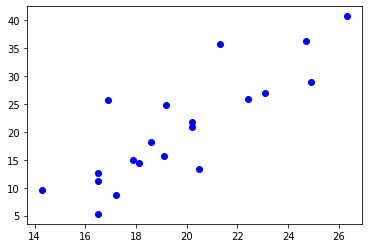

In [ ]:
## Plot the data

# include the original data points in our plot
plt.plot(X, Y, 'bo')

# display the plot
plt.show()

In [ ]:
## Initialize weights
w = 10
b =  -100

In [ ]:
def compute_loss(w,b):
    n = len(X)
    Y_pred = w*X + b
    sq_diff = (Y_pred - Y)**2
    loss = 1/n * np.sum(sq_diff)
    return loss

<details><summary>Solution</summary>

```
def compute_loss(w,b):
    n = len(X)
    Y_pred = w*X + b
    sq_diff = (Y_pred - Y)**2
    loss = 1/n * np.sum(sq_diff)
    return loss
```



In [ ]:
compute_loss(w,b)

6452.385

In [ ]:
## Train the model with a for-loop for gradient descent.

# Compute the loss after each parameter update and keep track
# in the following list:
loss_hist = []
learning_rate = .0001

# Number of steps to take:
num_steps = 200

for step in range(num_steps):
    loss = compute_loss(w,b)
    loss_hist.append(loss)
    Y_pred = w*X + b
    dw = 2/len(X) * np.sum((Y_pred - Y) * X)
    db = 2/len(X) * np.sum(Y_pred - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db


print('final weight: ', w)
print('final bias: ', b)


final weight:  6.031535862994707
final bias:  -100.1258488146001


<details><summary>Solution</summary>

```
    Y_pred = w*X + b
    dw = 2/len(X) * np.sum((Y_pred - Y) * X)
    db = 2/len(X) * np.sum(Y_pred - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
```

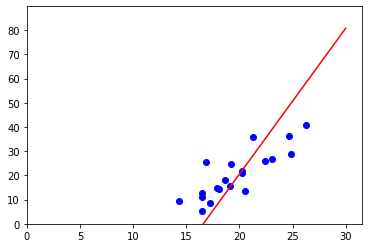

In [ ]:
## Plot the final line

# include the original data points in our plot
plt.plot(X, Y, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(0,30,100)

# compute the corresponding y-values for that long list
y = w*x + b # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)

# display the plot
plt.show()

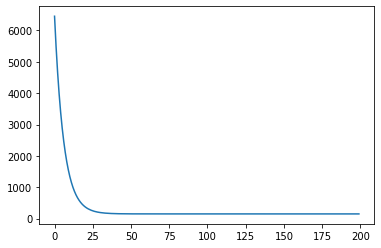

In [ ]:
# Visualize how the loss changed over time

plt.plot(loss_hist)
plt.show()

In [ ]:
## BONUS ##

# Play around with the learning rate and num_steps to try to train faster.

---


## 2. Regression with a Neural Network

---
In this exercise, we attempt to use a simple 2-layer neural network to fit the same data as in exercise 1.

This network will have the following architecture and use ReLU in the first hidden layer and no activation function in the second:
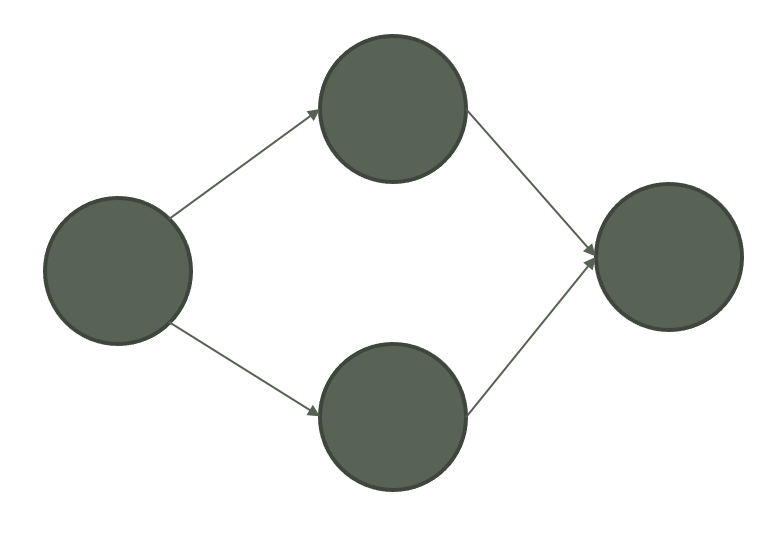

In [ ]:
# Normalize the data

X_norm = np.array((X - np.mean(X)) / np.std(X))
Y_norm = np.array((Y - np.mean(Y)) / np.std(Y))

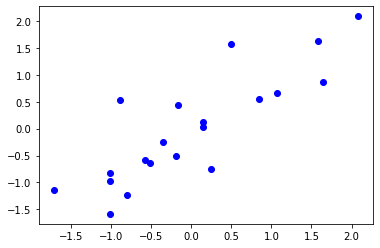

In [ ]:
## Plot the data

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# display the plot
plt.show()

In [ ]:
## Initialize weights

# First Layer
W1 = np.random.normal((2,1))
b1 = np.random.normal((2,1))

# Second Layer
W2 = np.random.normal((1,2)).reshape(1,2)
b2 = np.random.normal((1,)) - 5


initial_weights = [W1, b1, W2, b2]

In [ ]:
def feed_forward(X, weights):
    W1, b1, W2, b2 = weights

    ## Output of first layer
    W1 = W1.reshape(2,1)
    b1 = b1.reshape(2,1)
    X = np.array(X).reshape(1,len(X))

    Z1 = W1.dot(X) + b1
    H1 = np.maximum(Z1, 0)

    out = W2.dot(H1) + b2

    cache = H1, Z1
    return out, weights, cache

In [ ]:
# Define loss function

def mean_squared_loss(out,Y):
    n = len(X)
    sq_diff = (out - Y.reshape(1,20))**2
    loss = 1/n * np.sum(sq_diff)
    return loss

In [ ]:
import copy

def loss_numerical_gradient(weights, index, h = .00001):
    '''computes the numerical gradient of the loss
    relative to the parameter weights[index]'''

    num_grad = np.zeros_like(weights[index])

    it = np.nditer(weights[index], flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        weights_mh = copy.deepcopy(weights)
        weights_mh[index][ix] -= h
        out_mh = feed_forward(X_norm, weights_mh)[0]

        weights_ph = copy.deepcopy(weights)
        weights_ph[index][ix] += h
        out_ph = feed_forward(X_norm, weights_ph)[0]

        loss_mh = mean_squared_loss(out_mh, Y_norm)
        loss_ph = mean_squared_loss(out_ph, Y_norm)

        num_grad[ix] = (loss_ph - loss_mh) / (2*h)
        it.iternext()

    return num_grad

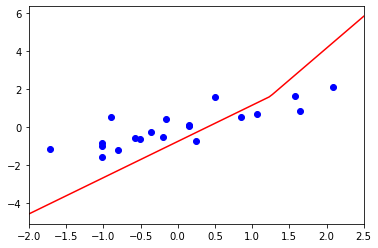

In [ ]:
## Plot the initial curve

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(-2,2.5,100)

# compute the corresponding y-values for that long list
y = feed_forward(x, initial_weights)[0].reshape(100,1) # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
# plt.ylim(ymin = 0)
plt.xlim(xmin = -2, xmax = 2.5)

# display the plot
plt.show()

In [ ]:
grads = {}
out, weights, cache = feed_forward(X_norm, initial_weights)
W2 = weights[2]
H1, Z1 = cache

n = len(X)
dout = 2/n * (out - np.array(Y_norm).reshape(1,20))
dout = np.array(dout).reshape(1,20)

## Backprop W2, b2
doutdW2 = H1.transpose()
dW2 = dout.dot(doutdW2)

db2 = dout.sum()

## Backprop W1, b1
doutdH1 = W2
dH1 = (dout.T.dot(doutdH1)).T

dH1dZ1 = (Z1 > 0)
dZ1 = dH1 * dH1dZ1

dZ1dW1 = X_norm.T
dW1 = dZ1dW1.dot(dZ1.T)

db1 = dZ1.sum(axis = 1)

grads['W2'] = dW2
grads['b2'] = db2
grads['W1'] = dW1
grads['b1'] = db1

In [ ]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [ ]:
# Check gradients against numerical gradients:

num_dW1 = loss_numerical_gradient(initial_weights, 0)
print('dW1 error:', rel_error(num_dW1,dW1))

num_db1 = loss_numerical_gradient(initial_weights, 1)
print('db1 error:', rel_error(num_db1,db1))

num_dW2 = loss_numerical_gradient(initial_weights, 2)
print('dW2 error:', rel_error(num_dW2,dW2))

num_db2 = loss_numerical_gradient(initial_weights, 3)
print('dW2 error:', rel_error(num_db2,db2))

dW1 error: 4.100073188927859e-12
db1 error: 5.000881193618358e-12
dW2 error: 2.7266920385364253e-11
dW2 error: 6.340565741425946e-12


In [ ]:
# Write a function for computing the gradient of the loss:

# out, weights, cache = feed_forward(X, weights)

def back_prop(out, weights, cache):
    grads = {}
    H1, Z1 = cache
    W2 = weights[2]

    n = len(X)
    dout = 2/n * (out - np.array(Y_norm).reshape(1,20))
    dout = np.array(dout).reshape(1,20)

    ## Backprop W2, b2
    doutdW2 = H1.transpose()
    dW2 = dout.dot(doutdW2)

    db2 = dout.sum()

    ## Backprop W1, b1
    doutdH1 = W2
    # dH1 = (dout.T.dot(doutdH1)).T
    dH1 = (doutdH1.T).dot(dout)

    dH1dZ1 = (Z1 > 0)
    dZ1 = dH1 * dH1dZ1

    dZ1dW1 = X_norm.T
    dW1 = dZ1dW1.dot(dZ1.T)

    db1 = dZ1.sum(axis = 1)

    grads['W2'] = dW2
    grads['b2'] = db2
    grads['W1'] = dW1
    grads['b1'] = db1

    return grads


In [ ]:
## Train the model with a for-loop for gradient descent.

# Compute the loss after each parameter update and keep track
# in the following list:
loss_hist = []
learning_rate = .01

# Number of steps to take:
num_steps = 100

weights = initial_weights

for step in range(num_steps):
    out, weights, cache = feed_forward(X_norm, weights)
    loss = mean_squared_loss(out, Y_norm)
    loss_hist.append(loss)
    grads = back_prop(out, weights, cache)
    dW1 = grads['W1']
    db1 = grads['b1']
    dW2 = grads['W2']
    db2 = grads['b2']

    num_dW1 = loss_numerical_gradient(weights, 0)
    print('dW1 error:', rel_error(num_dW1,dW1))

    num_db1 = loss_numerical_gradient(weights, 1)
    # print('db1 error:', rel_error(num_db1,db1))

    num_dW2 = loss_numerical_gradient(weights, 2)
    # print('dW2 error:', rel_error(num_dW2,dW2))

    num_db2 = loss_numerical_gradient(weights, 3)
    # print('dW2 error:', rel_error(num_db2,db2))

    weights[0] -= learning_rate * dW1
    weights[1] -= learning_rate * db1
    weights[2] -= learning_rate * dW2
    weights[3] -= learning_rate * db2

    print(W1, dW1, weights[0])

dW1 error: 4.100073188927859e-12
[0.55965681 0.85995976] [2.46121305 5.30904589] [0.55965681 0.85995976]
dW1 error: 2.8535357032906726e-12
[0.53839728 0.81278354] [2.12595225 4.7176225 ] [0.53839728 0.81278354]
dW1 error: 2.8022774034466744e-12
[0.5199427  0.77074345] [1.84545817 4.20400869] [0.5199427  0.77074345]
dW1 error: 4.316618889864043e-12
[0.50387302 0.7332199 ] [1.60696796 3.75235531] [0.50387302 0.7332199 ]
dW1 error: 3.7229299590496396e-12
[0.48985795 0.69970162] [1.40150774 3.35182822] [0.48985795 0.69970162]
dW1 error: 1.1091825899067765e-12
[0.47879057 0.66971589] [1.10673717 2.99857305] [0.47879057 0.66971589]
dW1 error: 2.9875711258925822e-12
[0.46883857 0.64265719] [0.99520066 2.70586915] [0.46883857 0.64265719]
dW1 error: 8.960516926821222e-13
[0.46408632 0.61810666] [0.47522486 2.45505321] [0.46408632 0.61810666]
dW1 error: 4.369265109685617e-12
[0.45979669 0.59572497] [0.42896247 2.23816888] [0.45979669 0.59572497]
dW1 error: 6.843128810775107e-12
[0.45594621 0.575

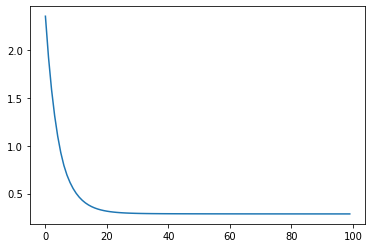

In [ ]:
# Visualize how the loss changed over time

plt.plot(loss_hist)
plt.show()

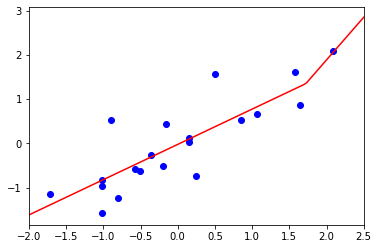

In [ ]:
## Plot the final curve

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(-2,2.5,100)

# compute the corresponding y-values for that long list
y = feed_forward(x, weights)[0].reshape(100,1) # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
# plt.ylim(ymin = 0)
plt.xlim(xmin = -2, xmax = 2.5)

# display the plot
plt.show()